In [1]:
# !pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

In [38]:
df = pdr.get_data_tiingo('AAPL',api_key='37775c278780da5562b03c23f9d61f4dc2f127da')

C:\Users\HARSHU\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [39]:
df.to_csv('D:\Deep Learning - Self\Datasets\AAPL.csv')

In [7]:
import pandas as pd

In [40]:
df = pd.read_csv(r'D:\Deep Learning - Self\Datasets\AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-09 00:00:00+00:00,155.84,156.73,155.4850,155.810,16200129,36.973561,37.184716,36.889336,36.966443,64800516,0.0,1.0
1,AAPL,2017-10-10 00:00:00+00:00,155.90,158.00,155.1000,156.055,15456331,36.987796,37.486028,36.797994,37.024570,61825324,0.0,1.0
2,AAPL,2017-10-11 00:00:00+00:00,156.55,156.98,155.7500,155.970,16607693,37.142011,37.244030,36.952208,37.004404,66430772,0.0,1.0
3,AAPL,2017-10-12 00:00:00+00:00,156.00,157.37,155.7299,156.350,16045720,37.011522,37.336559,36.947439,37.094560,64182880,0.0,1.0
4,AAPL,2017-10-13 00:00:00+00:00,156.99,157.28,156.4100,156.730,16287608,37.246402,37.315206,37.108795,37.184716,65150432,0.0,1.0


In [41]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-09-30 00:00:00+00:00,138.20,143.10,138.000,141.280,124925274,138.20,143.10,138.000,141.280,124925274,0.0,1.0
1254,AAPL,2022-10-03 00:00:00+00:00,142.45,143.07,137.685,138.210,114311663,142.45,143.07,137.685,138.210,114311663,0.0,1.0
1255,AAPL,2022-10-04 00:00:00+00:00,146.10,146.22,144.260,145.030,87830064,146.10,146.22,144.260,145.030,87830064,0.0,1.0
1256,AAPL,2022-10-05 00:00:00+00:00,146.40,147.38,143.010,144.075,79470968,146.40,147.38,143.010,144.075,79470968,0.0,1.0
1257,AAPL,2022-10-06 00:00:00+00:00,145.43,147.54,145.220,145.810,68402169,145.43,147.54,145.220,145.810,68402169,0.0,1.0


In [42]:
df = df.reset_index()['close']
df.shape

(1258,)

In [32]:
import matplotlib.pyplot as plt

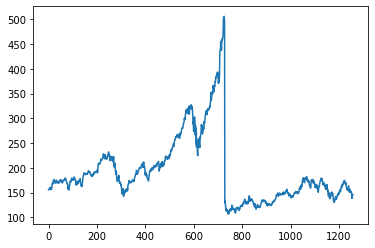

In [43]:
plt.plot(df);

##### LSTM is sensitive when it comes to the Scaling of the data, Therefore we apply MinMax Scalar
##### we'll be transforming 'close' feature between 0 to 1

In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [51]:
print(type(df))
print(df)

<class 'pandas.core.series.Series'>
0       155.84
1       155.90
2       156.55
3       156.00
4       156.99
         ...  
1253    138.20
1254    142.45
1255    146.10
1256    146.40
1257    145.43
Name: close, Length: 1258, dtype: float64


In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [54]:
print(type(df1))
print(df1)

<class 'numpy.ndarray'>
[[0.12273012]
 [0.1228804 ]
 [0.12450845]
 ...
 [0.09833438]
 [0.09908579]
 [0.09665623]]


In [56]:
df1.shape

(1258, 1)

##### Data Preprocessing -- Train-Test Split

In [57]:
print('Last 30% of the Time Series starts from {} to {}'.format(int(df1.shape[0]-(df1.shape[0]*0.3)),df.shape[0]))

Last 30% of the Time Series starts from 880 to 1258


In [63]:
## For training data
train_data = df1[:880,:]

## for testing data
test_data = df1[880:,:]

In [64]:
print(train_data.shape)
print(test_data.shape)

(880, 1)
(378, 1)


In [128]:
## convert an array of values into a dataset matrix based on the timesteps

## for example let's say my train data set is [120,126,124,129,136,130,139,145,.....] and 
## my test data set is [178,176,173,180,178,183,180,179,....]
## If my timestep = 5 ... then X_train[0] = 120,126,124,129,136 and y_train = 130
##                              X_train[1] = 126,124,129,136,130 and y_train = 139
##                              X_train[2] = 124,129,136,130,139 and y_train = 145 .... and so on
## similarly X_test[0] = 178,176,173,180,178 and y_test[0] = 183
##           X_test[1] = 176,173,180,178,183 and y_test[1] = 180
##           X_test[2] = 173,180,178,183,180 and y_test[2] = 179 ..... and so on

def create_dataset(dataset,time_step):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step),0])
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [129]:
## taking 'time_step' = 50
X_train,y_train = create_dataset(train_data,time_step=50)
X_test,y_test = create_dataset(test_data,time_step=50)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(830, 50)
(328, 50)
(830,)
(328,)


In [136]:
## reshaping the X_train & X_test in 3D array (samples, timestep, feature) which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print(X_train.shape)
print(X_test.shape)

(830, 50, 1)
(328, 50, 1)


In [139]:
## Create a Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [140]:
model = Sequential()
model.add(LSTM(35,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 50, 30)            7920      
                                                                 
 lstm_2 (LSTM)               (None, 40)                11360     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 24,501
Trainable params: 24,501
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
13/13 - 9s - loss: 0.0451 - val_loss: 0.0044 - 9s/epoch - 661ms/step
Epoch 2/100
13/13 - 1s - loss: 0.0201 - val_loss: 0.0063 - 818ms/epoch - 63ms/step
Epoch 3/100
13/13 - 1s - loss: 0.0132 - val_loss: 0.0011 - 800ms/epoch - 62ms/step
Epoch 4/100
13/13 - 1s - loss: 0.0096 - val_loss: 7.1756e-04 - 814ms/epoch - 63ms/step
Epoch 5/100
13/13 - 1s - loss: 0.0087 - val_loss: 3.7981e-04 - 767ms/epoch - 59ms/step
Epoch 6/100
13/13 - 1s - loss: 0.0080 - val_loss: 3.4713e-04 - 778ms/epoch - 60ms/step
Epoch 7/100
13/13 - 1s - loss: 0.0075 - val_loss: 3.7615e-04 - 806ms/epoch - 62ms/step
Epoch 8/100
13/13 - 1s - loss: 0.0071 - val_loss: 3.2291e-04 - 766ms/epoch - 59ms/step
Epoch 9/100
13/13 - 1s - loss: 0.0064 - val_loss: 5.2708e-04 - 787ms/epoch - 61ms/step
Epoch 10/100
13/13 - 1s - loss: 0.0060 - val_loss: 3.3096e-04 - 799ms/epoch - 61ms/step
Epoch 11/100
13/13 - 1s - loss: 0.0054 - val_loss: 0.0015 - 769ms/epoch - 59ms/step
Epoch 12/100
13/13 - 1s - loss: 0.0054 - val_loss: 5.1767e-

Epoch 95/100
13/13 - 1s - loss: 0.0016 - val_loss: 2.6083e-04 - 785ms/epoch - 60ms/step
Epoch 96/100
13/13 - 1s - loss: 0.0013 - val_loss: 2.6697e-04 - 768ms/epoch - 59ms/step
Epoch 97/100
13/13 - 1s - loss: 0.0014 - val_loss: 2.5736e-04 - 770ms/epoch - 59ms/step
Epoch 98/100
13/13 - 1s - loss: 0.0013 - val_loss: 2.4867e-04 - 767ms/epoch - 59ms/step
Epoch 99/100
13/13 - 1s - loss: 0.0014 - val_loss: 2.2564e-04 - 770ms/epoch - 59ms/step
Epoch 100/100
13/13 - 1s - loss: 0.0012 - val_loss: 2.3883e-04 - 767ms/epoch - 59ms/step


In [142]:
## Prediction and Check Performance

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 15ms/step


In [143]:
## Transforming the data back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [144]:
## Calculating RMSE
from sklearn.metrics import mean_squared_error

## train data RMSE
print('Train Data RMSE: ',np.sqrt(mean_squared_error(y_train,train_predict)))
print('Test Data RMSE: ',np.sqrt(mean_squared_error(y_test,test_predict)))

Train Data RMSE:  229.6572337218724
Test Data RMSE:  156.5546176541894


In [182]:
## we know that we've taken 'time_step' = 50
## also 'train_data' & 'test_data' are Standardized whereas 'train_predict' & 'test_predict' are transformed

timestep = 50
trainPredictplot = np.empty_like(df1) ## copy the dataframe just like 'df1'
trainPredictplot[:,:] = np.nan

testPredictplot = np.empty_like(df1)
testPredictplot[:,:] = np.nan

In [181]:
len(train_predict)

830

In [186]:
trainPredictplot[timestep:len(train_predict)+timestep,:] = train_predict
testPredictplot[len(train_predict)+(timestep*2):len(df1), :] = test_predict

In [180]:
train_data.shape
#X_train.shape

(880, 1)

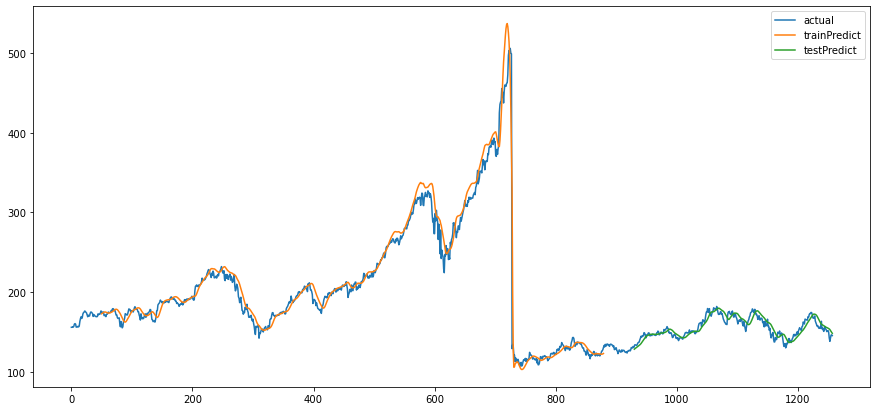

In [201]:
plt.figure(figsize=(15,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.legend(['actual','trainPredict','testPredict']);